# Churn Analysis
## Step 1: Understand your data?

- Data format?
- Missing data?
- Outliers?

## Step 2: What is my aim?

- Discover drivers of Churn?
- Why do we care about the Churn?

## Step 3: What is my initial hypothesis (gut feel/domain knowlege/literature survey)

- Higher monthly charges leads to higher churn?
- Non-senior citizens churn at higher rate
- More the services, less the churn?

### Exploratory question?

- How is churn differnt by service type?
- How is churn different by Contract type?
- How is churn different by payment type?

In [1]:
#Environment Set up
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
#import data
df = pd.read_csv('u_customer.csv')

df.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,...,has_churned,has_phone_and_internet,has_phone,has_internet,Concat Partners,partner_dependents,p_d_str,Tenure_bucket,Avg_ten_charge_check,Phone_internet_both
0,0002-ORFBO,Female,0.0,Yes,Yes,1.0,1.0,1.0,Mailed check,65.6,...,False,True,True,True,YesYes,3.0,Par Dep,0-24,65.92222222,Both
1,0003-MKNFE,Male,0.0,No,No,2.0,1.0,0.0,Mailed check,59.9,...,False,True,True,True,NoNo,0.0,No Part No Dep,0-24,60.26666667,Both
2,0004-TLHLJ,Male,0.0,No,No,1.0,2.0,0.0,Electronic check,73.9,...,True,True,True,True,NoNo,0.0,No Part No Dep,0-24,70.2125,Both
3,0011-IGKFF,Male,1.0,Yes,No,1.0,2.0,0.0,Electronic check,98.0,...,True,True,True,True,YesNo,1.0,Part No Dep,0-24,95.21923077,Both
4,0013-EXCHZ,Female,1.0,Yes,No,1.0,2.0,0.0,Mailed check,83.9,...,True,True,True,True,YesNo,1.0,Part No Dep,0-24,89.13333333,Both


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             7049 non-null   object 
 1   gender                  7049 non-null   object 
 2   is_senior_citizen       7049 non-null   float64
 3   partner                 7049 non-null   object 
 4   dependents              7049 non-null   object 
 5   phone_service           7049 non-null   float64
 6   internet_service        7049 non-null   float64
 7   contract_type           7049 non-null   float64
 8   payment_type            7049 non-null   object 
 9   monthly_charges         7049 non-null   float64
 10  total_charges           7038 non-null   float64
 11  churn                   7049 non-null   object 
 12  tenure                  7049 non-null   float64
 13  contract_type2          7049 non-null   object 
 14  Phone_type              7049 non-null   

In [4]:
# Clean Data
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7038 entries, 0 to 7048
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             7038 non-null   object 
 1   gender                  7038 non-null   object 
 2   is_senior_citizen       7038 non-null   float64
 3   partner                 7038 non-null   object 
 4   dependents              7038 non-null   object 
 5   phone_service           7038 non-null   float64
 6   internet_service        7038 non-null   float64
 7   contract_type           7038 non-null   float64
 8   payment_type            7038 non-null   object 
 9   monthly_charges         7038 non-null   float64
 10  total_charges           7038 non-null   float64
 11  churn                   7038 non-null   object 
 12  tenure                  7038 non-null   float64
 13  contract_type2          7038 non-null   object 
 14  Phone_type              7038 non-null   

In [5]:
# Update values killed
df.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,...,has_churned,has_phone_and_internet,has_phone,has_internet,Concat Partners,partner_dependents,p_d_str,Tenure_bucket,Avg_ten_charge_check,Phone_internet_both
0,0002-ORFBO,Female,0.0,Yes,Yes,1.0,1.0,1.0,Mailed check,65.6,...,False,True,True,True,YesYes,3.0,Par Dep,0-24,65.92222222,Both
1,0003-MKNFE,Male,0.0,No,No,2.0,1.0,0.0,Mailed check,59.9,...,False,True,True,True,NoNo,0.0,No Part No Dep,0-24,60.26666667,Both
2,0004-TLHLJ,Male,0.0,No,No,1.0,2.0,0.0,Electronic check,73.9,...,True,True,True,True,NoNo,0.0,No Part No Dep,0-24,70.2125,Both
3,0011-IGKFF,Male,1.0,Yes,No,1.0,2.0,0.0,Electronic check,98.0,...,True,True,True,True,YesNo,1.0,Part No Dep,0-24,95.21923077,Both
4,0013-EXCHZ,Female,1.0,Yes,No,1.0,2.0,0.0,Mailed check,83.9,...,True,True,True,True,YesNo,1.0,Part No Dep,0-24,89.13333333,Both


In [6]:
# Looking for outliers
df.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,...,has_churned,has_phone_and_internet,has_phone,has_internet,Concat Partners,partner_dependents,p_d_str,Tenure_bucket,Avg_ten_charge_check,Phone_internet_both
0,0002-ORFBO,Female,0.0,Yes,Yes,1.0,1.0,1.0,Mailed check,65.6,...,False,True,True,True,YesYes,3.0,Par Dep,0-24,65.92222222,Both
1,0003-MKNFE,Male,0.0,No,No,2.0,1.0,0.0,Mailed check,59.9,...,False,True,True,True,NoNo,0.0,No Part No Dep,0-24,60.26666667,Both
2,0004-TLHLJ,Male,0.0,No,No,1.0,2.0,0.0,Electronic check,73.9,...,True,True,True,True,NoNo,0.0,No Part No Dep,0-24,70.2125,Both
3,0011-IGKFF,Male,1.0,Yes,No,1.0,2.0,0.0,Electronic check,98.0,...,True,True,True,True,YesNo,1.0,Part No Dep,0-24,95.21923077,Both
4,0013-EXCHZ,Female,1.0,Yes,No,1.0,2.0,0.0,Mailed check,83.9,...,True,True,True,True,YesNo,1.0,Part No Dep,0-24,89.13333333,Both


[]

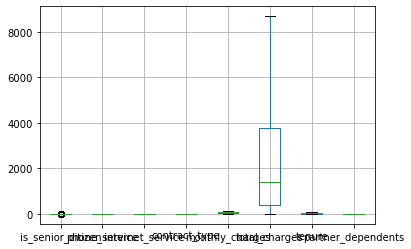

In [7]:
df.boxplot(return_type ='dict')
plt.plot()

In [8]:
x = df.iloc[:,0:1000].values
pd.options.display.float_format = '{:.1f}'.format
x_df = pd.DataFrame(x)
df.describe()

,is_senior_citizen,phone_service,internet_service,contract_type,monthly_charges,total_charges,tenure,partner_dependents
count,7038.0,7038.0,7038.0,7038.0,7038.0,7038.0,7038.0,7038.0
mean,0.2,1.3,1.2,0.7,64.8,2283.0,32.4,1.1
std,0.4,0.6,0.8,0.8,30.1,2266.5,24.6,1.2
min,0.0,0.0,0.0,0.0,18.2,18.8,1.0,0.0
25%,0.0,1.0,1.0,0.0,35.5,401.6,9.0,0.0
50%,0.0,1.0,1.0,0.0,70.3,1397.1,29.0,1.0
75%,0.0,2.0,2.0,1.0,89.9,3793.8,55.0,2.0
max,1.0,2.0,2.0,2.0,118.8,8684.8,79.0,3.0


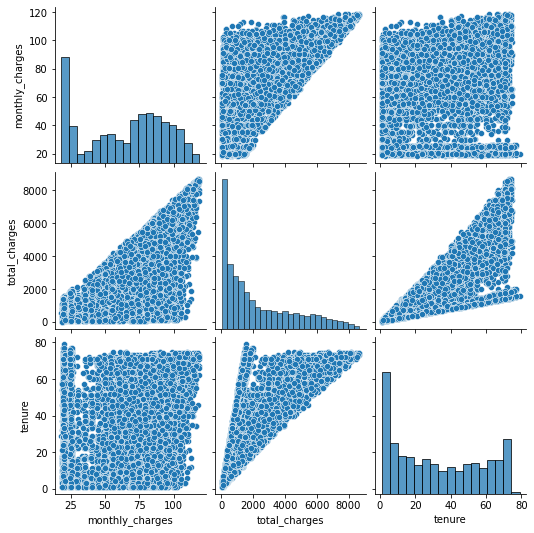

In [9]:
# IQR = MC - 54.4, TC - 3392.2, Tenure - 46
# Outliers :MC (-46.1, 171.65), TC ( -4687, 8881), Tenure (-60, 124) - No Outliers

x = df[['monthly_charges', 'total_charges','tenure']]

sns.pairplot(x)

In [10]:
mc = df['monthly_charges']
tc = df['total_charges']
ten = ['tenure']
df.corr()

,is_senior_citizen,phone_service,internet_service,contract_type,monthly_charges,total_charges,tenure,partner_dependents
is_senior_citizen,1.0,0.1,0.3,-0.1,0.2,0.1,0.0,-0.2
phone_service,0.1,1.0,0.3,0.1,0.5,0.4,0.3,0.0
internet_service,0.3,0.3,1.0,-0.3,0.9,0.4,0.0,-0.1
contract_type,-0.1,0.1,-0.3,1.0,-0.1,0.4,0.7,0.3
monthly_charges,0.2,0.5,0.9,-0.1,1.0,0.7,0.2,-0.0
total_charges,0.1,0.4,0.4,0.4,0.7,1.0,0.8,0.2
tenure,0.0,0.3,0.0,0.7,0.2,0.8,1.0,0.3
partner_dependents,-0.2,0.0,-0.1,0.3,-0.0,0.2,0.3,1.0


In [11]:
# looking for spearman r ans rank
import scipy
from scipy.stats import spearmanr
import pandas as pd
from pandas import Series, DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7038 entries, 0 to 7048
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             7038 non-null   object 
 1   gender                  7038 non-null   object 
 2   is_senior_citizen       7038 non-null   float64
 3   partner                 7038 non-null   object 
 4   dependents              7038 non-null   object 
 5   phone_service           7038 non-null   float64
 6   internet_service        7038 non-null   float64
 7   contract_type           7038 non-null   float64
 8   payment_type            7038 non-null   object 
 9   monthly_charges         7038 non-null   float64
 10  total_charges           7038 non-null   float64
 11  churn                   7038 non-null   object 
 12  tenure                  7038 non-null   float64
 13  contract_type2          7038 non-null   object 
 14  Phone_type              7038 non-null   

In [12]:
y = [['gender','is_senio_citizen','Phone_service','internet_service','payment_type','contract_type']]
gender = df['gender']
senior = df['is_senior_citizen']
phone = df['phone_service']
internet = df['internet_service']
payment = df['payment_type']
contract = df['contract_type']

x.corr()

,monthly_charges,total_charges,tenure
monthly_charges,1.0,0.7,0.2
total_charges,0.7,1.0,0.8
tenure,0.2,0.8,1.0


In [13]:
# Checking spearman Rank between variables
spearmanr_coefficient, p_value = spearmanr(gender,senior)
print('spearman Rank Correlation Coeffecient %0.3f' %(spearmanr_coefficient))

spearman Rank Correlation Coeffecient -0.002


In [14]:
spearmanr_coefficient, p_value = spearmanr(gender,phone)
print('spearman Rank Correlation Coeffecient %0.3f' %(spearmanr_coefficient))

spearman Rank Correlation Coeffecient -0.010


In [15]:
spearmanr_coefficient, p_value = spearmanr(gender,internet)
print('spearman Rank Correlation Coeffecient %0.3f' %(spearmanr_coefficient))

spearman Rank Correlation Coeffecient -0.010


In [16]:
spearmanr_coefficient, p_value = spearmanr(gender,payment)
print('spearman Rank Correlation Coeffecient %0.3f' %(spearmanr_coefficient))

spearman Rank Correlation Coeffecient 0.017


In [17]:
spearmanr_coefficient, p_value = spearmanr(gender,contract)
print('spearman Rank Correlation Coeffecient %0.3f' %(spearmanr_coefficient))

spearman Rank Correlation Coeffecient 0.001


In [18]:
spearmanr_coefficient, p_value = spearmanr(senior,phone)
print('spearman Rank Correlation Coeffecient %0.3f' %(spearmanr_coefficient))

spearman Rank Correlation Coeffecient 0.126


In [19]:
spearmanr_coefficient, p_value = spearmanr(senior,internet)
print('spearman Rank Correlation Coeffecient %0.3f' %(spearmanr_coefficient))

spearman Rank Correlation Coeffecient 0.263


In [20]:
spearmanr_coefficient, p_value = spearmanr(senior,payment)
print('spearman Rank Correlation Coeffecient %0.3f' %(spearmanr_coefficient))

spearman Rank Correlation Coeffecient -0.043


In [21]:
spearmanr_coefficient, p_value = spearmanr(senior,contract)
print('spearman Rank Correlation Coeffecient %0.3f' %(spearmanr_coefficient))

spearman Rank Correlation Coeffecient -0.143


In [22]:
spearmanr_coefficient, p_value = spearmanr(payment, contract)
print('spearman Rank Correlation Coeffecient %0.3f' %(spearmanr_coefficient))

spearman Rank Correlation Coeffecient -0.229


In [31]:
table = pd.crosstab(senior,internet)
from scipy.stats import chi2_contingency
chi2, p, dof, expected chi2_contingency(table.values)
print('Chi-square statistic %0.3f p_value %0.3f' % (chi2, p))

SyntaxError: invalid syntax (400567665.py, line 3)

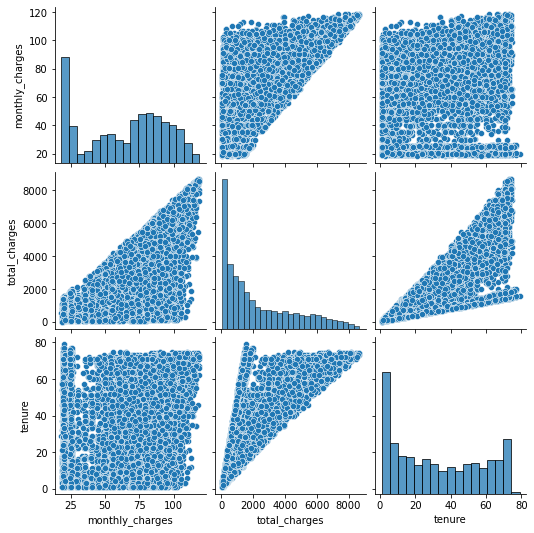

In [27]:
sns.pairplot(x)

In [30]:
pd.crosstab(senior, internet)

internet_service,0.0,1.0,2.0
is_senior_citizen,,,
0.0,1471,2158,2267
1.0,52,259,831


In [32]:
table = pd.crosstab(senior,internet)

from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(table.values)
print('Chi-square statistic %0.3f p_value %0.3f' % (chi2, p))

Chi-square statistic 493.857 p_value 0.000


In [33]:
table = pd.crosstab(senior,payment)

from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(table.values)
print('Chi-square statistic %0.3f p_value %0.3f' % (chi2, p))

Chi-square statistic 269.110 p_value 0.000


In [34]:
table = pd.crosstab(senior,phone)

from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(table.values)
print('Chi-square statistic %0.3f p_value %0.3f' % (chi2, p))

Chi-square statistic 152.047 p_value 0.000


In [35]:
table = pd.crosstab(payment,gender)

from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(table.values)
print('Chi-square statistic %0.3f p_value %0.3f' % (chi2, p))

Chi-square statistic 2.501 p_value 0.475


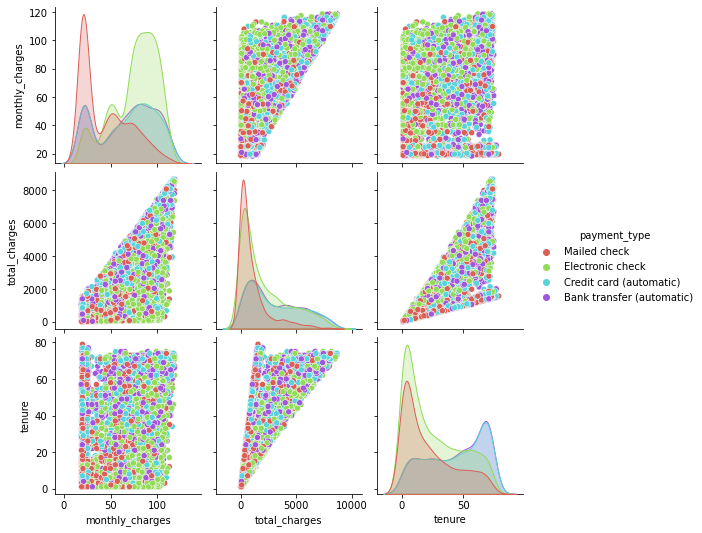

In [41]:
x = df[['monthly_charges', 'total_charges','tenure','payment_type']]
sns.pairplot(x, hue = 'payment_type', palette = 'hls')

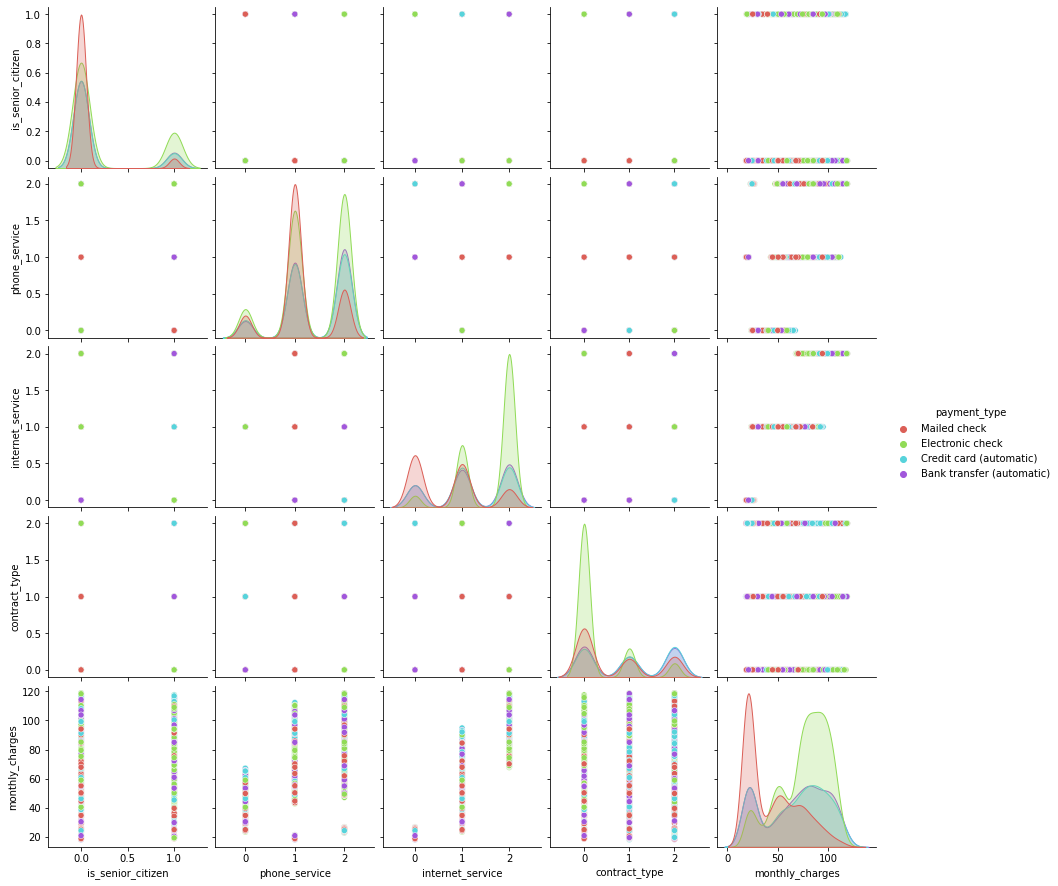

In [44]:
y = df[['gender','is_senior_citizen','phone_service','internet_service','payment_type','contract_type','monthly_charges']]
sns.pairplot(y, hue = 'payment_type', palette = 'hls')